In [1]:
import json 
import numpy as np 
import os
import matplotlib.pyplot as plt
from birdseye.definitions import RUN_DIR
import birdseye.utils 
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D

In [57]:
experiments = ({
    "lightweight_0.1speed": ({
        "target_speed": 0.1,
        "n_targets": 2,
        "planner": "lightweight"
    }),
    "lightweight_0.25speed": ({
        "target_speed": 0.25,
        "n_targets": 2,
        "planner": "lightweight"
    }),
    "lightweight": ({
        "target_speed": 0.5,
        "n_targets": 2,
        "planner": "lightweight"
    }),
    "lightweight_1speed": ({
        "target_speed": 1,
        "n_targets": 2,
        "planner": "lightweight"
    }),
    "lightweight_simple_0.1speed": ({
        "target_speed": 0.1,
        "n_targets": 2,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_0.25speed": ({
        "target_speed": 0.25,
        "n_targets": 2,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple": ({
        "target_speed": 0.5,
        "n_targets": 2,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_1speed": ({
        "target_speed": 1,
        "n_targets": 2,
        "planner": "lightweight_simple"
    }),
    
})

separable_experiments = ({
    "lightweight_separable_0.1speed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight_separable_0.5speed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight_separable_1speed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight_simple_separable_0.1speed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_0.5speed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_1speed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
})

separable2_experiments = ({
    "lightweight2_separable_0.1speed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight2_separable_0.5speed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight2_separable_1speed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight_simple_separable_0.1speed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_0.5speed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_1speed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
})

separable3_experiments = ({
    "lightweight3_separable_0.1speed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight3_separable_0.5speed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight3_separable_1speed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight_simple_separable_0.1speed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_0.5speed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_1speed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
})

separable3_experiments_2sensorspeed = ({
    "lightweight3_separable_0.1speed_2sensorspeed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight3_separable_0.5speed_2sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight3_separable_1speed_2sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight_simple_separable_0.1speed_2sensorspeed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_0.5speed_2sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_1speed_2sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
})

separable3_experiments_3sensorspeed = ({
    "lightweight3_separable_0.1speed_3sensorspeed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight3_separable_0.5speed_3sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight3_separable_1speed_3sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight_simple_separable_0.1speed_3sensorspeed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_0.5speed_3sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_1speed_3sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
})

separable3_experiments_compare = ({
    
    "lightweight_simple_separable_0.5speed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight3_separable_0.5speed_1sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight"
    }),
})

separable2_experiments_compare_1speed_1sensorspeed = ({
    
    "lightweight_simple_separable_1speed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight2_separable_1speed_1sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
})

separable2_experiments_compare_05speed_1sensorspeed = ({
    
    "lightweight_simple_separable_0.5speed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight2_separable_0.5speed_1sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight"
    }),
})

separable2_experiments_compare_01speed_1sensorspeed = ({
    
    "lightweight_simple_separable_0.1speed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight2_separable_0.1speed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
})
separable2_experiments_compare_01speed_2sensorspeed = ({
    
    "lightweight_simple_separable_0.1speed_2sensorspeed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight2_separable_0.1speed_2sensorspeed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
})
separable2_experiments_compare_05speed_2sensorspeed = ({
    
    "lightweight_simple_separable_0.5speed_2sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight2_separable_0.5speed_2sensorspeed_4target_plantime": ({
    #"lightweight2_separable_0.5speed_2sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight"
    }),
})
separable2_experiments_compare_1speed_2sensorspeed = ({
    
    "lightweight_simple_separable_1speed_2sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight2_separable_1speed_2sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
})

separable2_experiments_compare_01speed_3sensorspeed = ({
    
    "lightweight_simple_separable_0.1speed_3sensorspeed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight2_separable_0.1speed_3sensorspeed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
})
separable2_experiments_compare_05speed_3sensorspeed = ({
    
    "lightweight_simple_separable_0.5speed_3sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight2_separable_0.5speed_3sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight"
    }),
})
separable2_experiments_compare_1speed_3sensorspeed = ({
    
    "lightweight_simple_separable_1speed_3sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight2_separable_1speed_3sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
})
separable2_experiments_2sensorspeed = ({
    "lightweight2_separable_0.1speed_2sensorspeed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight2_separable_0.5speed_2sensorspeed_4target_plantime": ({
    #"lightweight2_separable_0.5speed_2sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight2_separable_1speed_2sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight_simple_separable_0.1speed_2sensorspeed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_0.5speed_2sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_1speed_2sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
})

separable2_experiments_3sensorspeed = ({
    "lightweight2_separable_0.1speed_3sensorspeed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight2_separable_0.5speed_3sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight2_separable_1speed_3sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight_simple_separable_0.1speed_3sensorspeed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_0.5speed_3sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_1speed_3sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
})

separable2_experiments_1sensorspeed = ({
    "lightweight2_separable_0.1speed_1sensorspeed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight2_separable_0.5speed_1sensorspeed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight2_separable_1speed_1sensorspeed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight"
    }),
    "lightweight_simple_separable_0.1speed_4target": ({
        "target_speed": 0.1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_0.5speed_4target": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight_simple_separable_1speed_4target": ({
        "target_speed": 1,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
})

separable2_experiments_compare_plantime = ({
    
    "lightweight_simple_separable_0.5speed_2sensorspeed_4target_plantime": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight_simple"
    }),
    "lightweight2_separable_0.5speed_2sensorspeed_4target_plantime": ({
        "target_speed": 0.5,
        "n_targets": 4,
        "planner": "lightweight"
    }),
})


In [3]:
# separable uses not last_selected
# separable2 uses a set 

In [6]:
deg_width = 40 
default_controls = np.linspace(-180,int(180-deg_width),int(360/deg_width))
print(default_controls)    

[-180. -140. -100.  -60.  -20.   20.   60.  100.  140.]


In [4]:
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_plantime.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    print(f"{experiment_name=}")
    print(f"{reader.average_plantime()=}")

experiment_name='lightweight_simple_separable_0.5speed_2sensorspeed_4target_plantime'
reader.average_plantime()=4.721186134132693
experiment_name='lightweight2_separable_0.5speed_2sensorspeed_4target_plantime'
reader.average_plantime()=11.926218418775349


In [ ]:
from timeit import default_timer as timer
import time
a = timer()
time.sleep(1)
b = timer()
print(b-a)

In [19]:
reader = birdseye.utils.ResultsReader("lightweight2_separable_0.5speed_2sensorspeed_4target_plantime")

print("======================================================================")
print(f"{experiment_name=}")
print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
print(f"Average runtime of successful runs = {reader.average_localization_time()}")
print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
print("======================================================================")

experiment_name='lightweight2_separable_0.5speed_2sensorspeed_4target_plantime'
Probability of successful localization of all targets = 0.69
Average runtime of successful runs = 102.26086956521739
Average rmse of successful runs = 12.799352137983632
Average rmse of all runs = 14.984905182100276
Average standard deviation of successful runs = 27.819764619053718
Average standard deviation of all runs = 31.828946580729554


In [24]:
a = [1,2,3]
b= a.copy()
b[1] = 200
print(a)
print(b)

[1, 2, 3]
[1, 200, 3]


In [53]:
a = {t for t in range(3)}

def remove_a(a): 
    a.remove(1)
    a.remove(2)
    a.remove(0)
    
    if len(a) == 0: 
        print(a)
        a.update([t for t in range(3)])
        print('hi')

print(a)
remove_a(a)
print(a)



{0, 1, 2}
set()
hi
{0, 2, 1}


In [17]:
reader = birdseye.utils.ResultsReader("lightweight2_separable_0.5speed_2sensorspeed_4target_plantime")
i = 0
for log_data in reader.log_data.values():
    plan_times = np.array([data["plan_time"] for data in log_data])
    print(plan_times)
    i += 1
    if i > 10: 
        break

[15.69795754 15.69795754 15.69795754 15.69795754 15.69795754 15.69795754
 15.69795754 15.69795754  1.72635175  1.72635175  1.72635175  1.72635175
  1.72635175  1.72635175  1.72635175  1.72635175  1.77258742  1.77258742
  1.77258742  1.77258742  1.77258742  1.77258742  1.77258742  1.77258742
  1.77968755  1.77968755  1.77968755  1.77968755  1.77968755  1.77968755
  1.77968755  1.77968755  1.77408343  1.77408343  1.77408343  1.77408343
  1.77408343  1.77408343  1.77408343  1.77408343 15.66552869 15.66552869
 15.66552869 15.66552869 15.66552869 15.66552869 15.66552869 15.66552869
 15.70624088 15.70624088 15.70624088 15.70624088 15.70624088 15.70624088
 15.70624088 15.70624088 15.64192978 15.64192978 15.64192978 15.64192978
 15.64192978 15.64192978 15.64192978 15.64192978 15.67686189 15.67686189
 15.67686189 15.67686189 15.67686189 15.67686189 15.67686189 15.67686189
 15.59486043 15.59486043 15.59486043 15.59486043 15.59486043 15.59486043
 15.59486043 15.59486043 15.59361964 15.59361964 15

In [16]:
reader = birdseye.utils.ResultsReader("lightweight_simple_separable_0.5speed_2sensorspeed_4target_plantime")
i = 0
for log_data in reader.log_data.values():
    plan_times = np.array([data["plan_time"] for data in log_data])
    print(plan_times)
    i += 1
    if i > 4: 
        break

[15.19204081 15.19204081 15.19204081 15.19204081 15.19204081 15.19204081
 15.19204081 15.19204081  1.67759157  1.67759157  1.67759157  1.67759157
  1.67759157  1.67759157  1.67759157  1.67759157  1.68097263  1.68097263
  1.68097263  1.68097263  1.68097263  1.68097263  1.68097263  1.68097263
  1.66635998  1.66635998  1.66635998  1.66635998  1.66635998  1.66635998
  1.66635998  1.66635998  1.67259457  1.67259457  1.67259457  1.67259457
  1.67259457  1.67259457  1.67259457  1.67259457  1.71327912  1.71327912
  1.71327912  1.71327912  1.71327912  1.71327912  1.71327912  1.71327912
  1.66522255  1.66522255  1.66522255  1.66522255  1.66522255  1.66522255
  1.66522255  1.66522255  1.71826613  1.71826613  1.71826613  1.71826613
  1.71826613  1.71826613  1.71826613  1.71826613  1.72731226  1.72731226
  1.72731226  1.72731226  1.72731226  1.72731226  1.72731226  1.72731226
  1.71106528  1.71106528  1.71106528  1.71106528  1.71106528  1.71106528
  1.71106528  1.71106528  1.67326402  1.67326402  1

In [5]:
list(reader.log_data.values())[-1]

[{'time': 1666400711.062339,
  'target': [[94.22420868145733, 112.07743164970135, 100.0, 0.5],
   [93.2502495400542, 265.4733015920348, 190.0, 0.5],
   [59.28952350508088, 59.28009017055486, 10.0, 0.5],
   [78.50023419817016, 294.42526150128543, 250.0, 0.5]],
  'sensor': [2.0, 20.0, 20.0, 2.0],
  'action': [20.0, 2.0],
  'observation': [[-73.22853031179211],
   [-80.92028038864171],
   [-60.597739536212686],
   [-65.72739938382327]],
  'std_dev_cartesian': [[85.27336477314842, 87.92605528320938],
   [80.67540515738155, 99.38577803848246],
   [89.45145809284882, 72.47983250622215],
   [87.98345688598158, 78.97803822241075]],
  'std_dev_polar': [[54.213095475086476, 92.19306167075672],
   [52.02566649494367, 88.11998628593452],
   [55.95909914511194, 102.4292773117556],
   [55.22175323702502, 98.71362155253726]],
  'r_err': [48.54250443078366,
   49.34398862654802,
   57.06876144187627,
   51.32468464471307],
  'theta_err': [87.04124841616772,
   90.01795441639906,
   90.9531560990153,
 

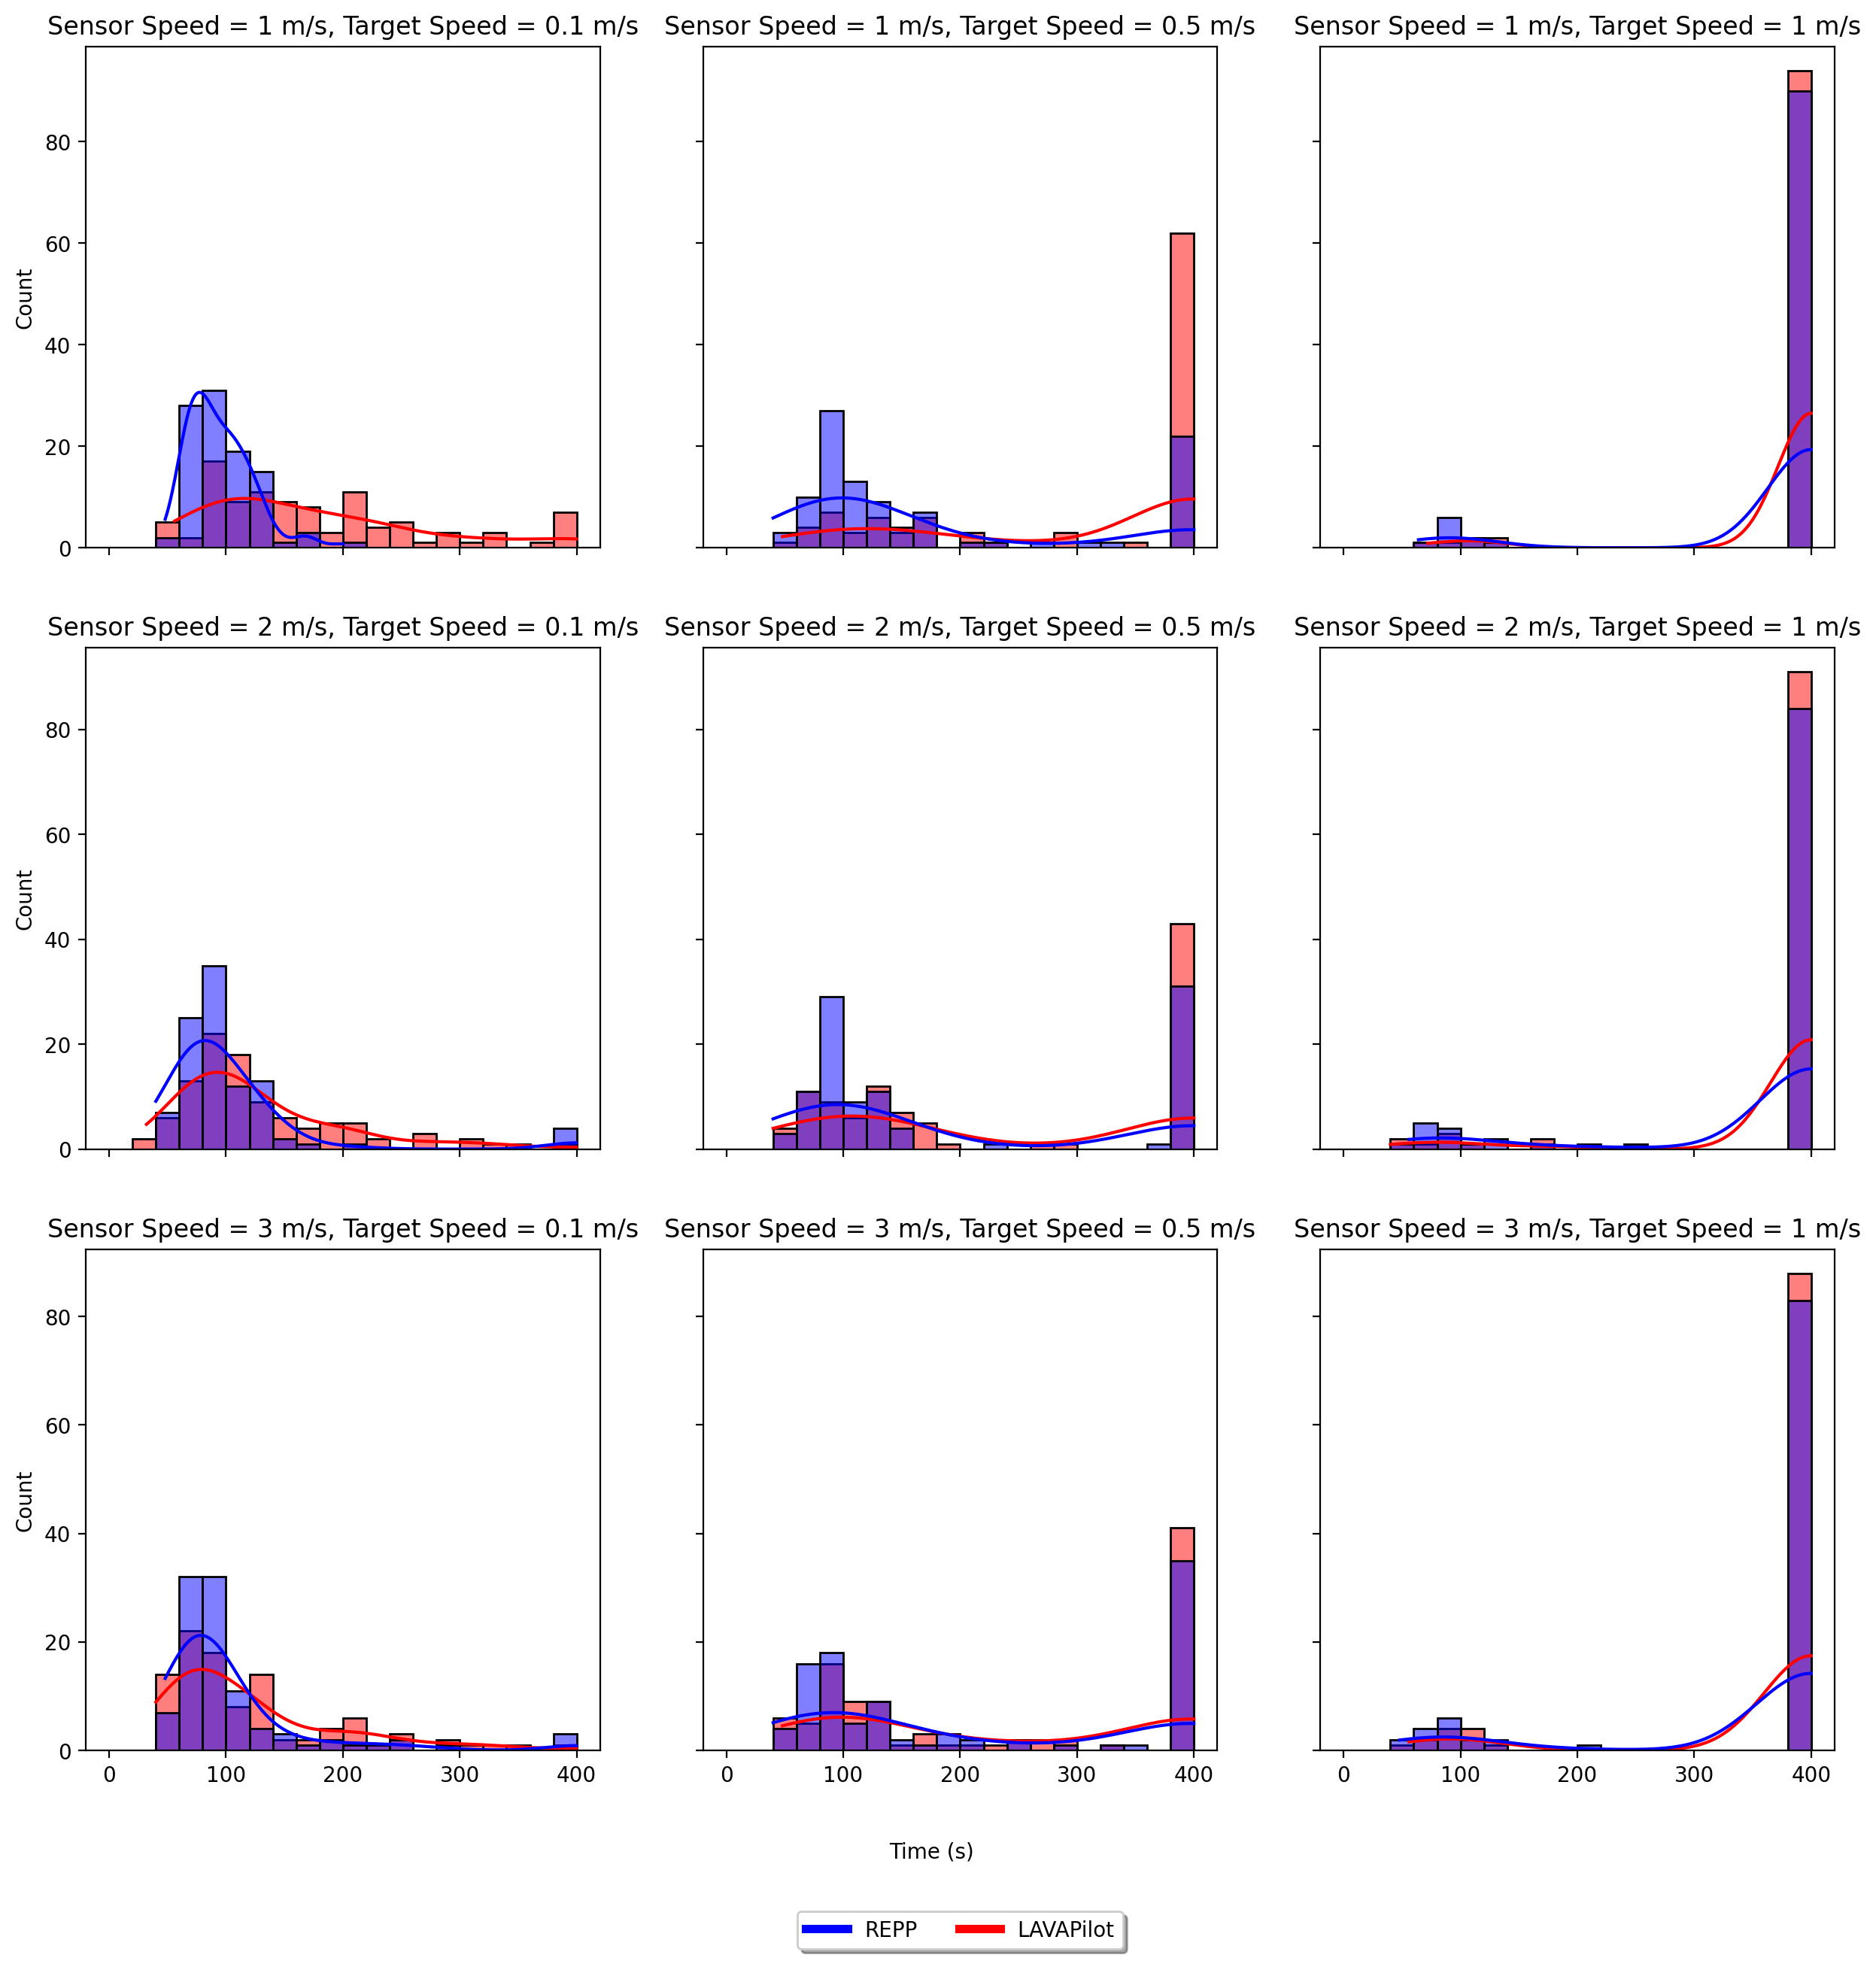

In [58]:
fig, axs = plt.subplots(3, 3, sharey='row', figsize=(15,15), dpi=200)

#fig = plt.figure(figsize=(5,3))
#ax = fig.subplots()
ax = axs[0,0]
facecolors = ["pink","lightblue"]
colors = ["red", "blue"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_1sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
    
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 1 m/s, Target Speed = 0.1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
#plt.show()

#fig = plt.figure(figsize=(5,3))
#ax = fig.subplots()
ax = axs[0,1]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_1sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 1 m/s, Target Speed = 0.5 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
#plt.show()

#fig = plt.figure(figsize=(5,3))
#ax = fig.subplots()
ax = axs[0,2]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_1sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 1 m/s, Target Speed = 1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
#plt.show()

##################
ax = axs[1,0]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_2sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 2 m/s, Target Speed = 0.1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
    
ax = axs[1,1]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_2sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 2 m/s, Target Speed = 0.5 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
    
ax = axs[1,2]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_2sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 2 m/s, Target Speed = 1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)

################

ax = axs[2,0]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_3sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
ax.set_title("Sensor Speed = 3 m/s, Target Speed = 0.1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)

ax = axs[2,1]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_3sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
ax.set_title("Sensor Speed = 3 m/s, Target Speed = 0.5 m/s")
custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

#ax.legend(custom_lines, labels)
ax.legend(custom_lines, ["REPP","LAVAPilot"],loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=2)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)

ax = axs[2,2]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_3sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
ax.set_title("Sensor Speed = 3 m/s, Target Speed = 1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
    
    
fig.text(0.5, 0.08, 'Time (s)', ha='center', va='center')
#fig.text(0.08, 0.5, 'Count', ha='center', va='center', rotation='vertical')

plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
colors = ["red", "blue"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_1sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, ["REPP","LAVAPilot"])

plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
colors = ["red", "blue"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_1sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, ["REPP","LAVAPilot"])

plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
colors = ["red", "blue"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_1sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, ["REPP","LAVAPilot"])

plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
colors = ["red", "blue"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_2sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, ["REPP","LAVAPilot"])

plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
colors = ["red", "blue"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_2sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, ["REPP","LAVAPilot"])

plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
colors = ["red", "blue"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_2sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, ["REPP","LAVAPilot"])

plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
colors = ["red", "blue"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_3sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, ["REPP","LAVAPilot"])

plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
colors = ["red", "blue"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_3sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, ["REPP","LAVAPilot"])

plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(4,4))
ax = fig.subplots()
colors = ["red", "blue"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_3sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, ["REPP","LAVAPilot"])

plt.show()

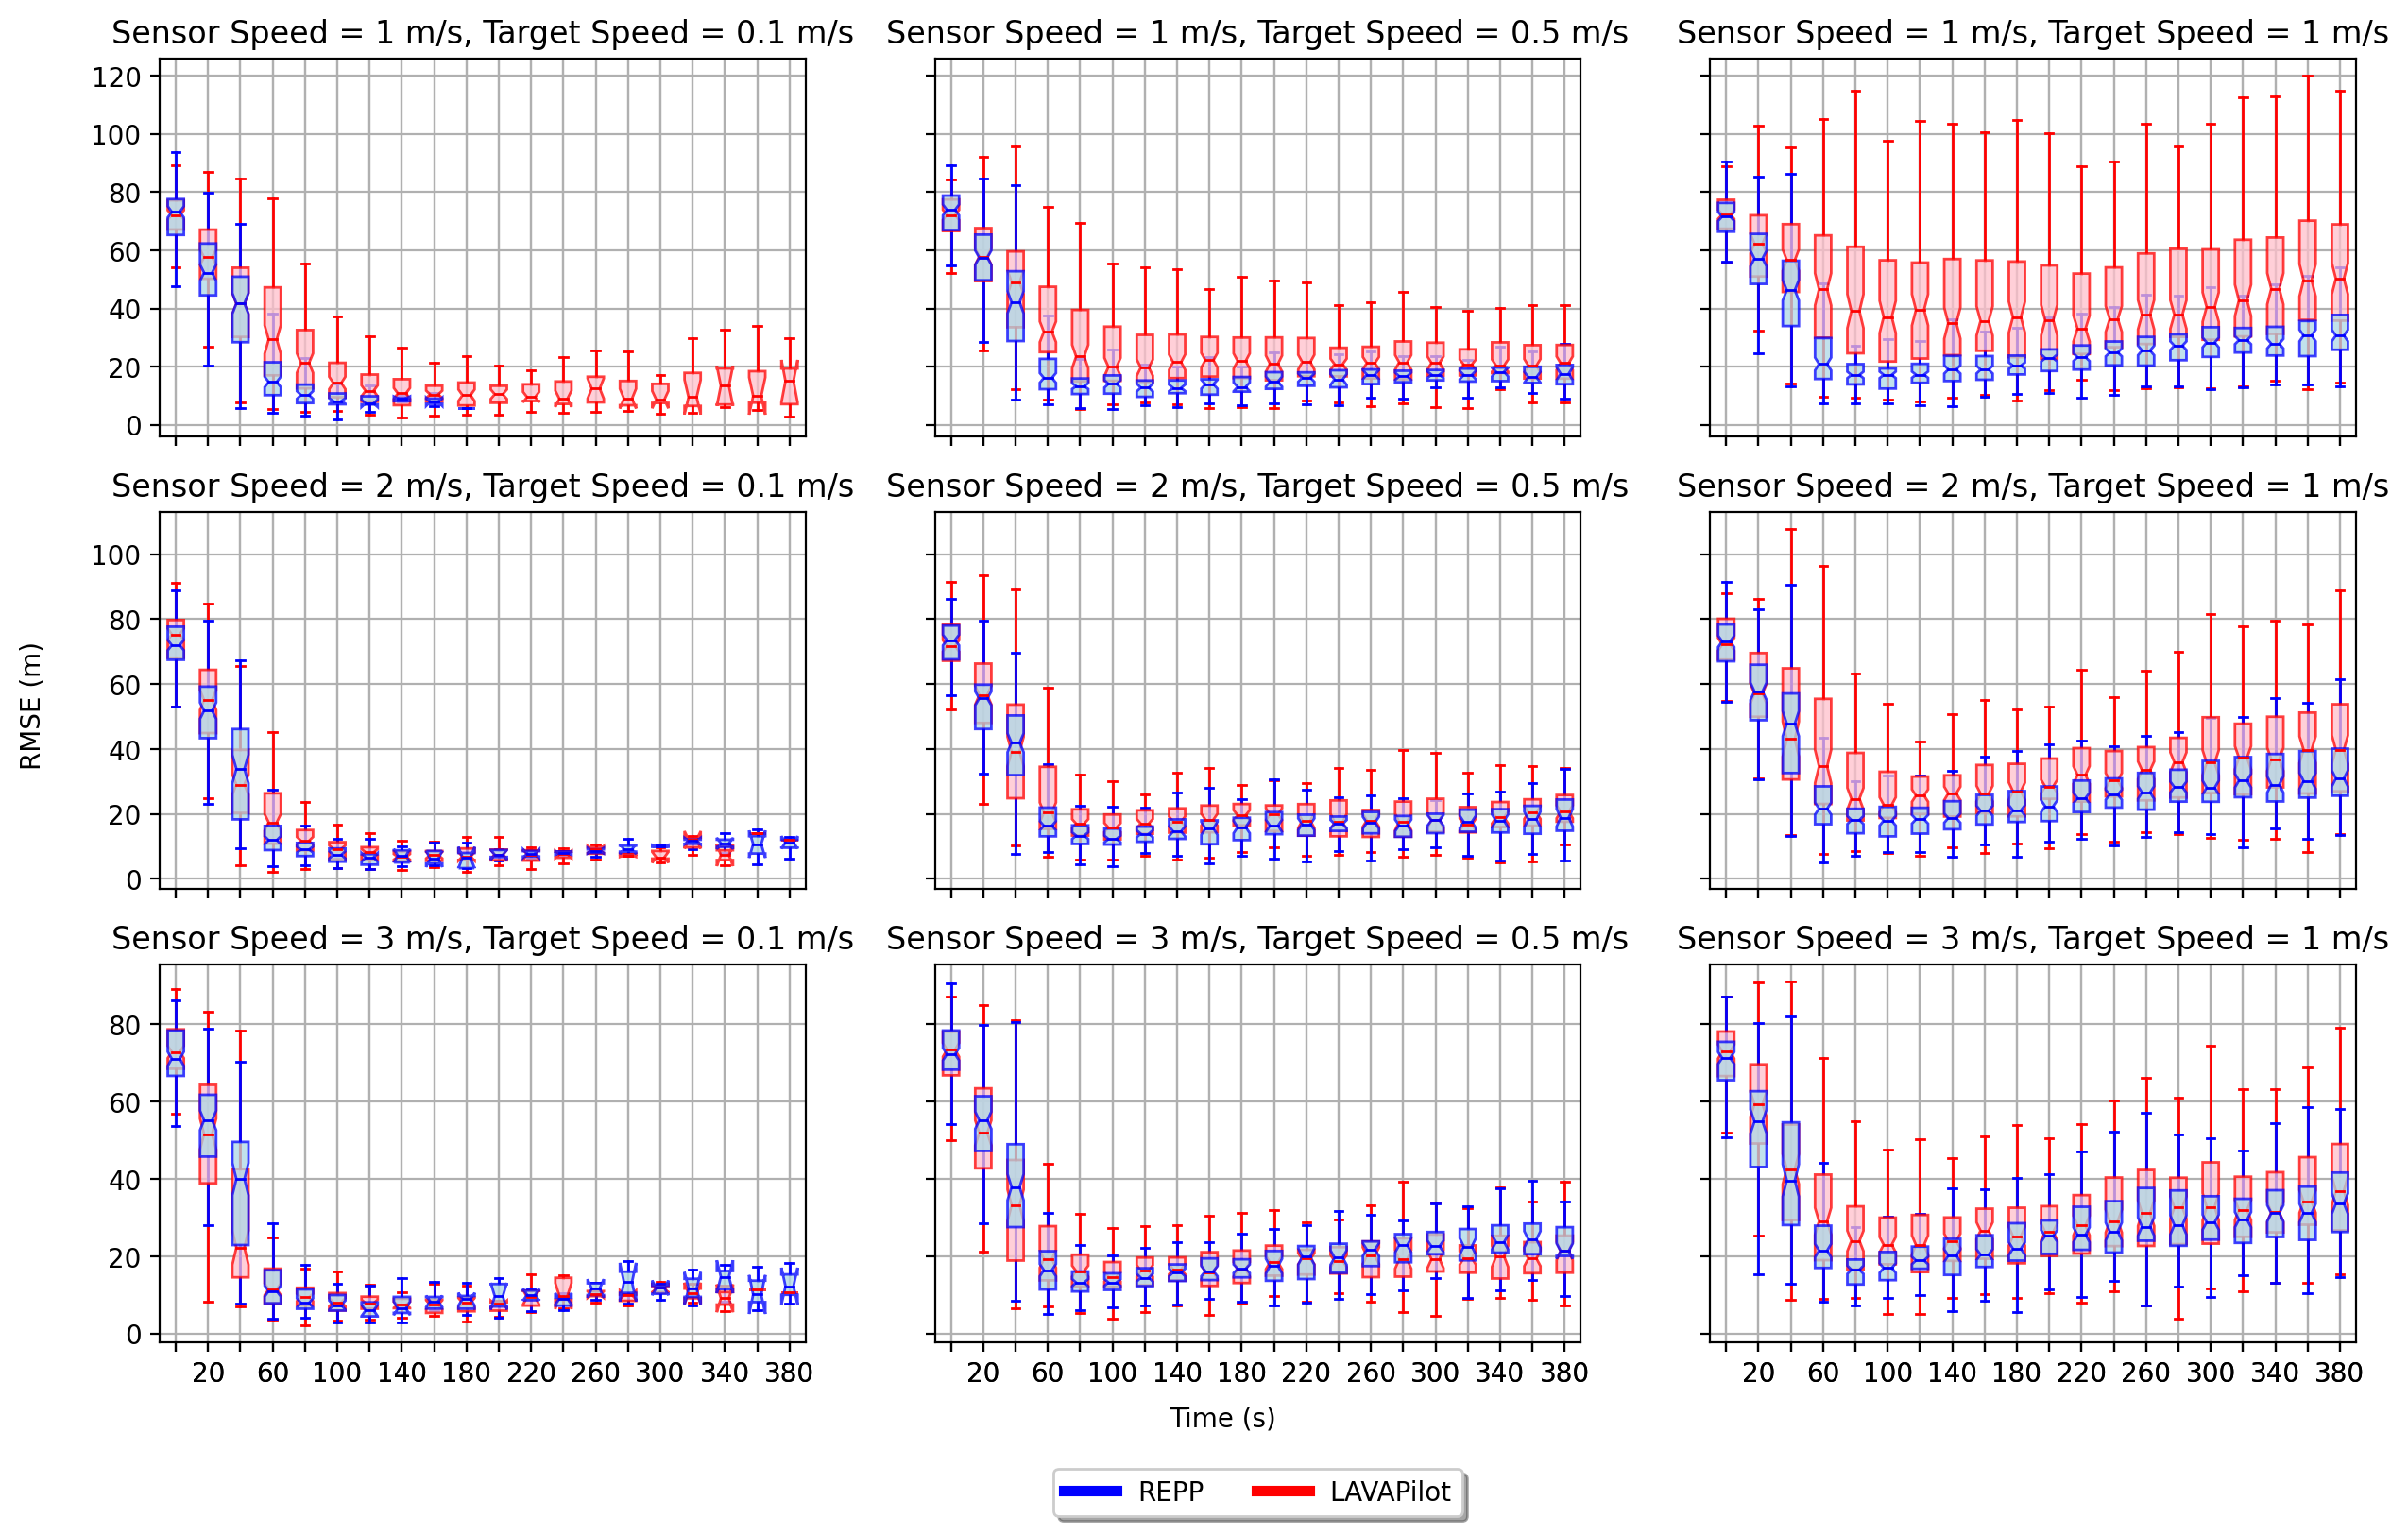

In [59]:
fig, axs = plt.subplots(3, 3, sharey='row', figsize=(15,9), dpi=200)

#fig = plt.figure(figsize=(5,3))
#ax = fig.subplots()
ax = axs[0,0]
facecolors = ["pink","lightblue"]
colors = ["red", "blue"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_1sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
    
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 1 m/s, Target Speed = 0.1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
#plt.show()

#fig = plt.figure(figsize=(5,3))
#ax = fig.subplots()
ax = axs[0,1]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_1sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 1 m/s, Target Speed = 0.5 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
#plt.show()

#fig = plt.figure(figsize=(5,3))
#ax = fig.subplots()
ax = axs[0,2]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_1sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 1 m/s, Target Speed = 1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
#plt.show()

##################
ax = axs[1,0]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_2sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 2 m/s, Target Speed = 0.1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
    
ax = axs[1,1]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_2sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 2 m/s, Target Speed = 0.5 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
    
ax = axs[1,2]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_2sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 2 m/s, Target Speed = 1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)

################

ax = axs[2,0]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_3sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.set_title("Sensor Speed = 3 m/s, Target Speed = 0.1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
ax.tick_params(axis='x',labelsize=10)
for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)

ax = axs[2,1]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_3sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.set_title("Sensor Speed = 3 m/s, Target Speed = 0.5 m/s")
custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

#ax.legend(custom_lines, labels)
ax.legend(custom_lines, ["REPP","LAVAPilot"],loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=2)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
ax.tick_params(axis='x',labelsize=10)
for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)

ax = axs[2,2]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_3sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.set_title("Sensor Speed = 3 m/s, Target Speed = 1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
ax.tick_params(axis='x',labelsize=10)
for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)
    
    
fig.text(0.5, 0.08, 'Time (s)', ha='center', va='center')
fig.text(0.08, 0.5, 'RMSE (m)', ha='center', va='center', rotation='vertical')

plt.show()

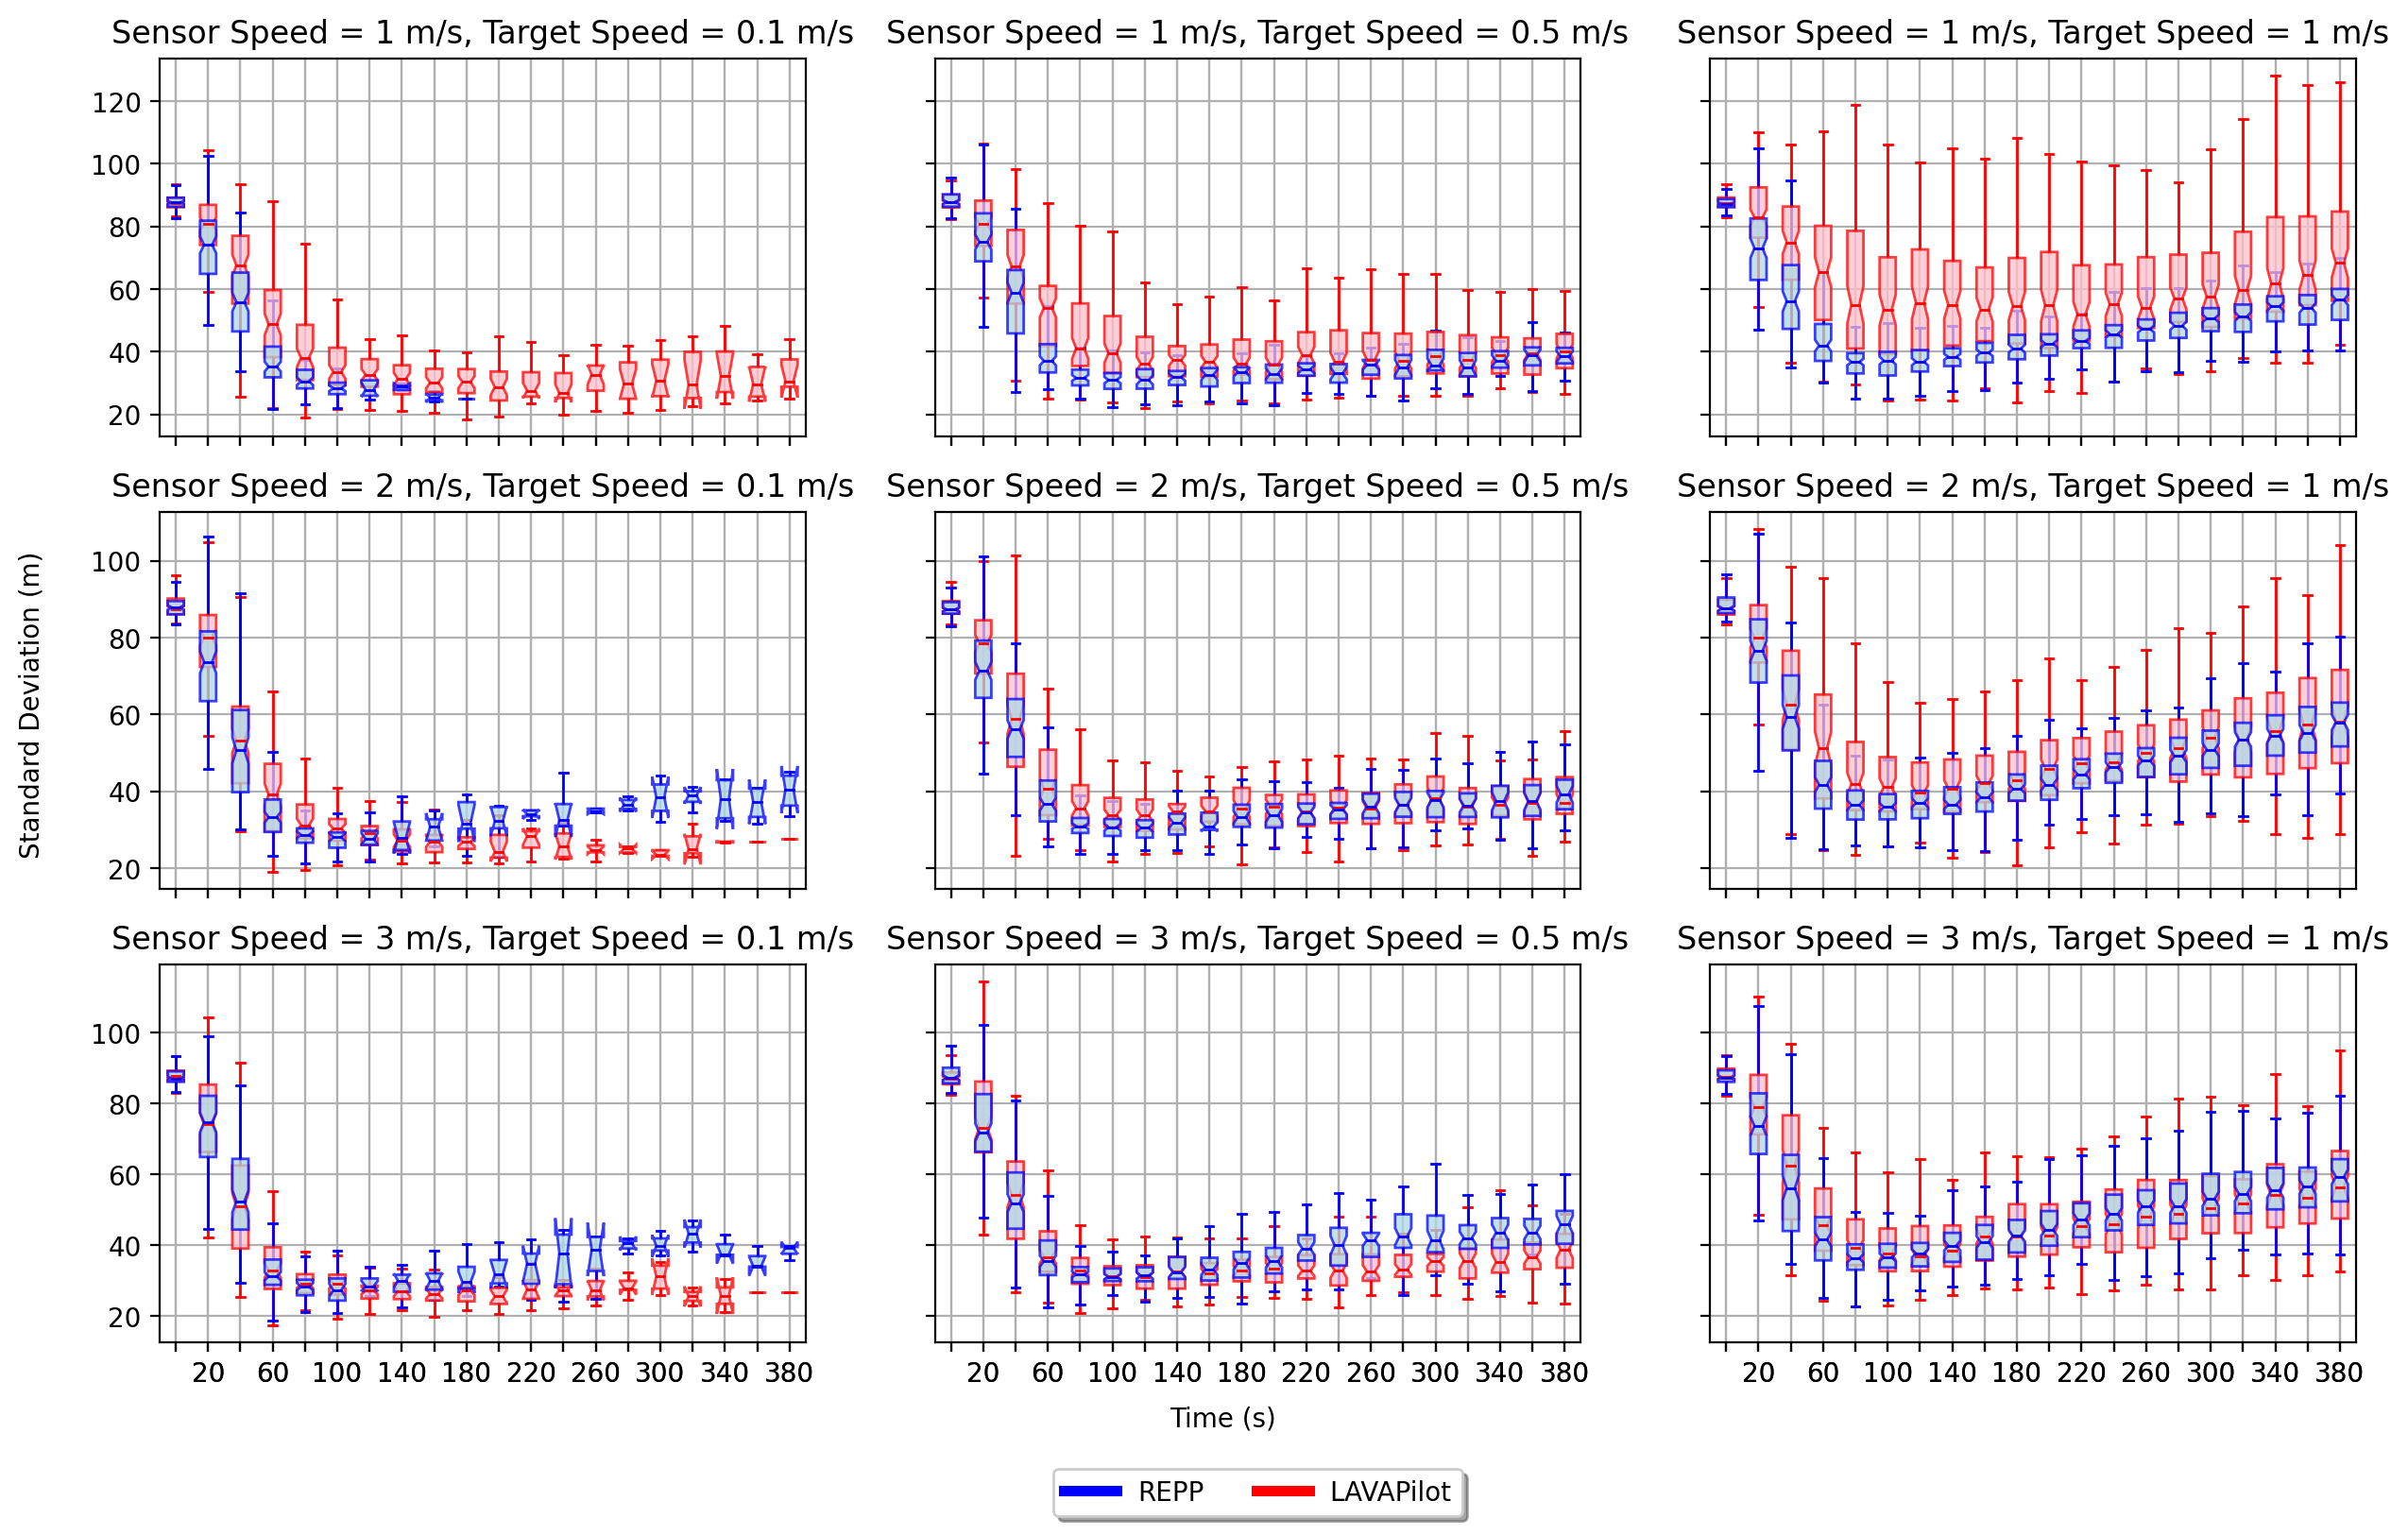

In [60]:
fig, axs = plt.subplots(3, 3, sharey='row', figsize=(15,9), dpi=200)

#fig = plt.figure(figsize=(5,3))
#ax = fig.subplots()
ax = axs[0,0]
facecolors = ["pink","lightblue"]
colors = ["red", "blue"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_1sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.std_dev_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
    
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 1 m/s, Target Speed = 0.1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
#plt.show()

#fig = plt.figure(figsize=(5,3))
#ax = fig.subplots()
ax = axs[0,1]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_1sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.std_dev_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 1 m/s, Target Speed = 0.5 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
#plt.show()

#fig = plt.figure(figsize=(5,3))
#ax = fig.subplots()
ax = axs[0,2]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_1sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.std_dev_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 1 m/s, Target Speed = 1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
#plt.show()

##################
ax = axs[1,0]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_2sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.std_dev_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 2 m/s, Target Speed = 0.1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
    
ax = axs[1,1]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_2sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.std_dev_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 2 m/s, Target Speed = 0.5 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)
    
ax = axs[1,2]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_2sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.std_dev_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.xaxis.set_ticklabels([])
ax.set_title("Sensor Speed = 2 m/s, Target Speed = 1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
# ax.tick_params(axis='x',labelsize=10)
# for label in ax.get_xticklabels()[::2]:
#     label.set_visible(False)

################

ax = axs[2,0]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_3sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.std_dev_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.set_title("Sensor Speed = 3 m/s, Target Speed = 0.1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
ax.tick_params(axis='x',labelsize=10)
for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)

ax = axs[2,1]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_3sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.std_dev_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.set_title("Sensor Speed = 3 m/s, Target Speed = 0.5 m/s")
custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

#ax.legend(custom_lines, labels)
ax.legend(custom_lines, ["REPP","LAVAPilot"],loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=2)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
ax.tick_params(axis='x',labelsize=10)
for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)

ax = axs[2,2]

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_3sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.std_dev_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)
ax.set_title("Sensor Speed = 3 m/s, Target Speed = 1 m/s")
# custom_lines = [Line2D([0], [0], color="blue", lw=4),
#                 Line2D([0], [0], color="red", lw=4),
#                 ]

# ax.legend(custom_lines, labels)
# ax.set_xlabel("Time")
# ax.set_ylabel("RMSE")
ax.tick_params(axis='x',labelsize=10)
for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)
    
    
fig.text(0.5, 0.08, 'Time (s)', ha='center', va='center')
fig.text(0.08, 0.5, 'Standard Deviation (m)', ha='center', va='center', rotation='vertical')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,4))
ax = fig.subplots()
facecolors = ["lightblue","pink"]
colors = ["blue", "red"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_2sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, labels)
ax.set_xlabel("Time")
ax.set_ylabel("RMSE")
plt.show()

fig = plt.figure(figsize=(12,4))
ax = fig.subplots()

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_2sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, labels)
ax.set_xlabel("Time")
ax.set_ylabel("RMSE")
plt.show()

fig = plt.figure(figsize=(12,4))
ax = fig.subplots()

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_2sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, labels)
ax.set_xlabel("Time")
ax.set_ylabel("RMSE")
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,4))
ax = fig.subplots()
facecolors = ["lightblue","pink"]
colors = ["blue", "red"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_3sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, labels)
ax.set_xlabel("Time")
ax.set_ylabel("RMSE")
plt.show()

fig = plt.figure(figsize=(12,4))
ax = fig.subplots()

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_3sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, labels)
ax.set_xlabel("Time")
ax.set_ylabel("RMSE")
plt.show()

fig = plt.figure(figsize=(12,4))
ax = fig.subplots()

i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_3sensorspeed.items():
    reader = birdseye.utils.ResultsReader(experiment_name)
    reader.rmse_plot(ax=ax, color=colors[i], facecolor=facecolors[i])
    i += 1
    labels.append(experiment_name)

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, labels)
ax.set_xlabel("Time")
ax.set_ylabel("RMSE")
plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(12,4))
ax = fig.subplots()
colors = ["blue","red"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed_2sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    reader.rmse_plot(ax=ax, color=colors[i],)
    #reader.std_dev_plot(ax=ax, color=colors[i], experiment_name=experiment_name)
    #reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
    print("======================================================================")
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, labels)
ax.set_xlabel("Time")
ax.set_ylabel("RMSE")
plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(18,4))
ax = fig.subplots()
colors = ["blue","red"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_2sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    reader.rmse_plot(ax=ax, color=colors[i],)
    #reader.std_dev_plot(ax=ax, color=colors[i], experiment_name=experiment_name)
    #reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
    print("======================================================================")
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, labels)
ax.set_xlabel("Time")
ax.set_ylabel("RMSE")
plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(18,4))
ax = fig.subplots()
colors = ["blue","red"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed_2sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    reader.rmse_plot(ax=ax, color=colors[i],)
    #reader.std_dev_plot(ax=ax, color=colors[i], experiment_name=experiment_name)
    #reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
    print("======================================================================")
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, labels)
ax.set_xlabel("Time")
ax.set_ylabel("RMSE")
plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(18,4))
ax = fig.subplots()
colors = ["blue","red"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_1speed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    reader.rmse_plot(ax=ax, color=colors[i],)
    #reader.std_dev_plot(ax=ax, color=colors[i], experiment_name=experiment_name)
    #reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
    print("======================================================================")
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, labels)
ax.set_xlabel("Time")
ax.set_ylabel("RMSE")
plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(18,4))
ax = fig.subplots()
colors = ["blue","red"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_01speed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    reader.rmse_plot(ax=ax, color=colors[i],)
    #reader.std_dev_plot(ax=ax, color=colors[i], experiment_name=experiment_name)
    #reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
    print("======================================================================")
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, labels)
ax.set_xlabel("Time")
ax.set_ylabel("RMSE")

plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(18,4))
ax = fig.subplots()
colors = ["blue","red"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    reader.rmse_plot(ax=ax, color=colors[i],)
    #reader.std_dev_plot(ax=ax, color=colors[i], experiment_name=experiment_name)
    #reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
    print("======================================================================")
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, labels)
ax.set_xlabel("Time")
ax.set_ylabel("RMSE")
plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(18,4))
ax = fig.subplots()
colors = ["blue","red"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    reader.std_dev_plot(ax=ax, color=colors[i], experiment_name=experiment_name)
    #reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
    print("======================================================================")
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, labels)
ax.set_xlabel("Time")
ax.set_ylabel("Std. Dev.")
plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.subplots()
fig = plt.figure(figsize=(18,4))
ax = fig.subplots()
colors = ["red", "blue"]
i = 0
labels = []
for experiment_name, experiment_config in separable2_experiments_compare_05speed_1sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    #reader.std_dev_plot(ax=ax, color=colors[i], experiment_name=experiment_name)
    reader.localization_histogram(ax=ax, color=colors[i])
    i += 1
    labels.append(experiment_name)
    print("======================================================================")
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                ]

ax.legend(custom_lines, ["REPP","LAVAPilot"])

plt.show()

In [ ]:

for experiment_name, experiment_config in separable2_experiments_1sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    #reader.std_dev_plot()
    print("======================================================================")

In [ ]:
for experiment_name, experiment_config in separable2_experiments_3sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    #reader.std_dev_plot()
    print("======================================================================")

In [ ]:
for experiment_name, experiment_config in separable2_experiments_2sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    #reader.std_dev_plot()
    print("======================================================================")

In [ ]:
for experiment_name, experiment_config in separable3_experiments_3sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    #reader.std_dev_plot()
    print("======================================================================")

In [ ]:
for experiment_name, experiment_config in separable3_experiments_2sensorspeed.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    #reader.std_dev_plot()
    print("======================================================================")

In [ ]:
for experiment_name, experiment_config in separable3_experiments.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    reader.std_dev_plot()
    print("======================================================================")

In [ ]:
for run, log_data in reader.log_data.items():
    a = np.array(log_data[-1]["std_dev_cartesian"])
    std_dev_all = []
    std_dev = np.max(log_data[-1]["std_dev_cartesian"], axis=1)
    for d in log_data: 
        print(np.mean(np.max(np.array(d["std_dev_cartesian"]), axis=1)))
    print([np.mean(np.max(np.array(d["std_dev_cartesian"]), axis=1)) for d in log_data])
    print(std_dev.shape)
    df = pd.DataFrame(log_data)
    for dd in df["std_dev_cartesian"]:
        print(np.mean(np.max(dd, axis=1)))
    print(np.concatenate(df["std_dev_cartesian"].to_numpy()).shape)
    break


In [ ]:
for experiment_name, experiment_config in separable2_experiments.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    print("======================================================================")

In [ ]:
for experiment_name, experiment_config in separable_experiments.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    print("======================================================================")

In [ ]:
for experiment_name, experiment_config in experiments.items():
    
    reader = birdseye.utils.ResultsReader(experiment_name)
    
    print("======================================================================")
    print(f"{experiment_name=}")
    print(f"Probability of successful localization of all targets = {reader.localization_probability()}")
    print(f"Average runtime of successful runs = {reader.average_localization_time()}")
    print(f"Average rmse of successful runs = {reader.average_rmse()[0]}")
    print(f"Average rmse of all runs = {reader.average_rmse()[1]}")
    print(f"Average standard deviation of successful runs = {reader.average_std_dev()[0]}")
    print(f"Average standard deviation of all runs = {reader.average_std_dev()[1]}")
    print("======================================================================")